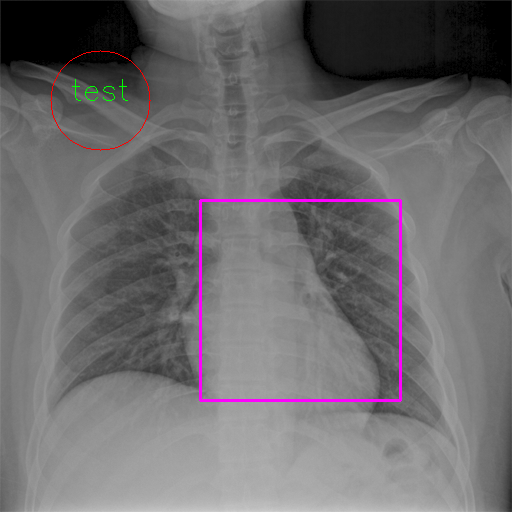

-1

In [11]:
# -*- coding: utf-8 -*- -
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/python/data/chest.bmp') # 2번째 인수가 없으면 color 형으로 read 
color = (0,255,0)

# 이미지에 문자 출력 : 문자열, 위치, 크기, 색, 두께
cv2.putText(image,"test",(70, 100), cv2.FONT_HERSHEY_SIMPLEX,1., color, 1)

# 이미지에 사각형 출력 : 시작위치, 종료위치, 색, 두께
cv2.rectangle(image, (200, 200), (400,400),(255,0,255), 2)

# 이미지에 원 출력 : 중심위치, 반지름, 색, 두께
cv2.circle(image, (100,100), 50, (0,0,255), 1)
cv2_imshow(image)
cv2.waitKey(0)

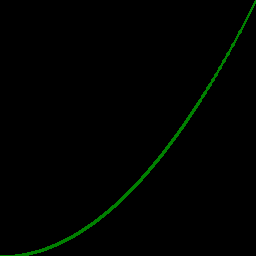

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# LUT 생성 함수
def power_transform(gamma,LUT) :
    i=0
    for i in range(0,256):
        tmp=255.0*pow((i/255.0), gamma) # 0~255 -> 0~1
        if tmp>255 :
           tmp=255
        LUT[i]=tmp

# 그래프 생성
def view_1d(mat,size,data,DX,DY,yscale):
    cv2.rectangle(mat, (0,0), (256,256), (0,0,0), -1)
    i=0
    for i in range(0,size-1):
        cv2.line(mat,(DX+i,DY-yscale*data[i]),(DX+i+1,DY-yscale*data[i+1]),(0,128,0),2)

# 2차원 컬러 이미지 생성
view = np.zeros((256,256,3),np.uint8) 
LUT = np.zeros(256,np.uint8)

gamma = 2
power_transform(gamma, LUT)
view_1d(view, 256, LUT, 0, 256, 1)
cv2_imshow(view)

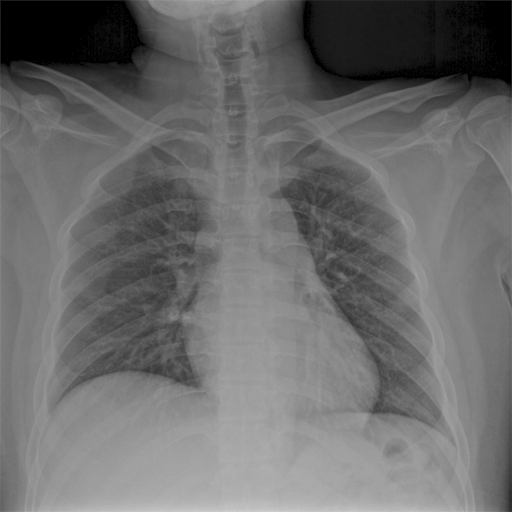

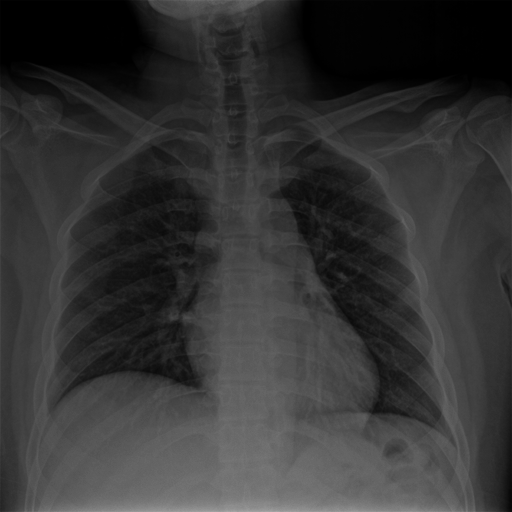

In [ ]:
import cv2
import numpy as np

#멱함수 변환 함수
def power_transform(gamma,LUT):
  for i in range(0, 256):
    tmp=255.0*pow((i/255.0), gamma)
    if tmp>255:
      tmp=255
    LUT[i]=tmp

image = cv2.imread('/content/drive/MyDrive/python/data/chest.bmp',cv2.IMREAD_GRAYSCALE)
dst = image.copy()

# gamma 값(변동 가능)                                   
gamma=2

#멱함수 변환 시 사용되는 1차원 배열  
LUT = np.zeros(256, np.uint8)
power_transform(gamma, LUT)

w = image.shape[1]
h = image.shape[0]

for i in range (0,h):
  for j in range(0, w):
    dst[i][j] = LUT[image[i][j]] # dst 이미지 변환(멱함수 변환)

cv2_imshow(image)
cv2_imshow(dst)